# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [678]:
#import libraries
import pandas as pd 
import requests
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [679]:
#create a function that reads csv
def data(arg):
    df = pd.read_csv(arg)
    return df


In [680]:
df_twitter = data('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [681]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open("image_predictions.tsv",'wb') as f:
    f.write(r.content)


In [682]:
# store image predictions in a dataframe
df_image = pd.read_csv('image_predictions.tsv',sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1]:
#Importing from twitter API
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


##tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
         #   tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
         #   json.dump(tweet._json, outfile)
          #  outfile.write('\n')
        #except tweepy.TweepError as e:
          #  print("Fail")
           # fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [683]:
#Read the tweet-json.txt file line by line using pd.read_json
df= pd.read_json('tweet-json.txt',lines = True)


## Assessing Data


In [684]:
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [685]:
df_twitter[df_twitter.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [686]:
df_twitter.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [687]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674045139...,3,10,None,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,None,None,None


In [688]:
df_twitter.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [689]:
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [690]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [691]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [692]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [693]:
df.tail(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [694]:
df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2163,2015-11-25 04:11:57+00:00,669367896104181761,669367896104181760,This is Chip. Chip's pretending to be choked. ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669367892388003840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,485,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
304,2017-02-27 17:01:56+00:00,836260088725786625,836260088725786624,This is Lucy. She spent all morning overseeing...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 836260074393747456, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,23177,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1849,2015-12-12 16:16:45+00:00,675710890956750848,675710890956750848,This is Lenny. He was just told that he couldn...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675710882740092928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2046,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1056,2016-06-12 00:44:30+00:00,741793263812808706,741793263812808704,When your crush won't pay attention to you. Bo...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 741793243084521472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4982,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1473,2016-01-31 03:49:30+00:00,693642232151285760,693642232151285760,Meet Freddery. He's a Westminster Toblerone. S...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 693642227030085632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2790,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [696]:
df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [697]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [698]:
df_image.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [699]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
47,666817836334096384,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953,True,standard_schnauzer,0.285276,True,giant_schnauzer,0.073764,True
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,1,Border_collie,0.462408,True,collie,0.214556,True,Eskimo_dog,0.035604,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
120,668190681446379520,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,1,Blenheim_spaniel,0.958402,True,cocker_spaniel,0.026764,True,Welsh_springer_spaniel,0.007790,True
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


In [700]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [701]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues
#### df_twitter
1.timestamp column is not in time format

2.rating denominator should be 10

3.The source column of the df_twitter column contains strings of tags,we want to carefully extract the application used to make tweets from the source column into another column called application.

4.The tweet_id column should be a string not an integer

5.some dog names in the df_twitter column are in lower case and they aren't actual names

6.We want only original tweets and not retweets or replies

7.The rating denominator column are unneccesary as well as the rating_denominator','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id' columns

8.Rename ratings_numerator to ratings/10

### Tidiness issues
1. The puppo,doggo,floofer and pupper column should be under one column called dog_stages instead of 4

2. The twitter archived data (df_twitter) should merge with the jsondata (df) and the image predictions dataset(df_image)

3. Merge the archive data with the image predictions dataset to get the image predictions url and number of images.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [702]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_clean = df.copy()
df_image_clean = df_image.copy()

### Issue #1: The timestamp column in the df_twitter column is not in the right format it should be in a datetime format not string

#### Define: Use the pandas to time function to convert the timestamp column from string to datetime

#### Code

In [703]:
#Use pandas to time function to convert to date-time format
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

#### Test

In [704]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: The denominator should be 10 and not higher or lower

#### Define Bring out all values of the denominator not equal to 10 and convert them to 10

#### Code

In [705]:
#Create a mask with the condition not equal to 10
mask = df_twitter_clean.rating_denominator != 10
# store the column name string into a variable
column_name ='rating_denominator'
# using loc convert the mask to 10
df_twitter_clean.loc[mask,column_name] = 10

#### Test

In [706]:

df_twitter_clean[df_twitter_clean['rating_denominator']!= 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: The source column of the df_twitter column contains strings of tags,we want to carefully extract the application used to make tweets from the source column into another column called application.

#### Define Use split function to extract from the source the particular application used for the tweets excluding the anchor tags

#### Code

In [707]:
df_twitter_clean.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [708]:
#create a column and apply the split function into lambda
df_twitter_clean['application'] = df_twitter_clean['source'].apply(lambda x : x.split('>')[1][:-3])



#### test

In [709]:
df_twitter_clean.application.values

array(['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for iPhone', 'Twitter for iPhone',
       'Twitter for iPhone'], dtype=object)

### Issue #4: The tweet_id and id columns in each dataframe should be converted to strings

### define use astype to convert it to a string using astype

#### Code 

In [710]:
# convert the columns using astype()
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype('string')
df_clean['id'] = df_clean['id'].astype('string')
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('string')

#### test

In [711]:
df_image_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   string
dtypes: string(1)
memory usage: 16.3 KB


In [712]:
df_twitter_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   string
dtypes: string(1)
memory usage: 18.5 KB


In [713]:
df_clean.id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   string
dtypes: string(1)
memory usage: 18.5 KB


### Issue #5: some dog names in the df_twitter column are in lower case and they aren't actual names

### define create a mask to select those dog names in lowercases and replace them with 'None'.

#### Code

In [714]:
#create a mask that only filters names that start with small letters
mask = df_twitter_clean['name'].str.contains(r'^[a-z]')
df_twitter_clean[mask].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [715]:
# set the mask to None
df_twitter_clean[mask] = 'None'

#### test

In [716]:
 
df_twitter_clean[df_twitter_clean['name'].str.contains(r'^[a-z]')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,application


#### Issue #6 We want only original tweets and not retweets or replies

### Define : subset only colums where the retweet_id and reply_id is null to remove retweet and replies from the dataset

#### Code 

In [717]:
# Use condition to subset only where retweetand reply id is null
df_twitter_clean =df_twitter_clean[df_twitter_clean['retweeted_status_user_id'].isna()]
df_twitter_clean = df_twitter_clean[df_twitter_clean['in_reply_to_user_id'].isna()]

### test

In [718]:
df_twitter_clean['retweeted_status_user_id'].count()

0

In [719]:
df_twitter_clean['in_reply_to_user_id'].count()

0

### Issue #7 The rating denominator column are unneccesary as well as the rating_denominator','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_tomestamp','in_reply_to_user_id' columns

### Define: Drop all rating denominator column as it doesn't matter as they are all 10 and also drop the reply status,retweet status columns as the rows have been dropped.

#### Code

In [720]:
#droppping the 'rating_denominator','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id'
df_twitter_clean.drop(['rating_denominator','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id'],axis =1,inplace =True)

### test

In [721]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1993 non-null   string
 1   timestamp         1993 non-null   object
 2   source            1993 non-null   object
 3   text              1993 non-null   object
 4   expanded_urls     1990 non-null   object
 5   rating_numerator  1993 non-null   object
 6   name              1993 non-null   object
 7   doggo             1993 non-null   object
 8   floofer           1993 non-null   object
 9   pupper            1993 non-null   object
 10  puppo             1993 non-null   object
 11  application       1993 non-null   object
dtypes: object(11), string(1)
memory usage: 202.4+ KB


### Issue #8 Rename ratings_numerator to ratings/10

#### define : The ratings_numerator column should be renamed using the .rename function

#### Code

In [722]:
#rename the column
df_twitter_clean.rename(columns = {'rating_numerator':'ratings/10'}, inplace = True)

In [723]:
#convert column to integer
df_twitter_clean['ratings/10'] =df_twitter_clean['ratings/10'].astype(int)

### test

In [724]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'ratings/10', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'application'],
      dtype='object')

### Issue #8 : Subsetting only important columns from the json text (df_clean) useful for analysis

### Define : Subset the 'id',"favorite_count",'retweet_count' columns and save them to the df_clean variable

In [725]:
df_clean = df_clean[['id',"favorite_count",'retweet_count']]

### code

In [726]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   string
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 55.3 KB


### Issue 9# The id column name doesn't match the column name of the archive dataset df_twitter_clean and will raise issues while trying to merge.

### Define : Use the rename function to rename the df_clean dataframe column to tweet_id so it can merge with the archive data frame(df_twitter_clean)

#### Code

In [727]:
df_clean.rename(columns = {'id' : 'tweet_id'},inplace =True )

### test

In [728]:

df_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Tidiness #1 : The puppo,doggo,floofer and pupper column should be under one column called dog_stages instead of 4

### Define : Add the doggo', 'floofer', 'pupper', 'puppo' columns together and attach it to a column named dog stage,use the replace function nested in the apply function to replace all rows in the dog_stage column that have the string  None and replace with an empty string. This way we can get the various dog stages and then drop the columns   

### code

In [729]:
# create a new column that adds the string rows of floofer,pupper,doggo and puppo
df_twitter_clean['dog_stage'] = df_twitter_clean['doggo'] +  df_twitter_clean['floofer'] +  df_twitter_clean['pupper'] + df_twitter_clean['puppo']
# examine the new column
df_twitter_clean['dog_stage'].value_counts()

NoneNoneNoneNone        1671
NoneNonepupperNone       210
doggoNoneNoneNone         70
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        8
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

The dog stage colum has a the string 'None' as expected after joining the columns so we can clean this by replacing None with an empty string and then we also notice some strings have 2 stages i guess it was a mistake i will solve it by adding a slash in between instead of dropping the rows.

In [730]:
# use the apply function to replace None with an empty string
df_twitter_clean['dog_stage'] = df_twitter_clean.dog_stage.apply(lambda x : x.replace('None',''))
# use apply function to replace the mixed values of dogstage and seprate them with a /
df_twitter_clean['dog_stage'] = df_twitter_clean.dog_stage.apply(lambda x : x.replace('doggopuppo','doggo/puppo'))
df_twitter_clean['dog_stage'] = df_twitter_clean.dog_stage.apply(lambda x : x.replace('doggofloofer','doggo/floofer'))
df_twitter_clean['dog_stage'] = df_twitter_clean.dog_stage.apply(lambda x : x.replace('doggopupper','doggo/pupper'))

#### test

In [731]:
df_twitter_clean.dog_stage.value_counts()

                 1671
pupper            210
doggo              70
puppo              23
floofer             9
doggo/pupper        8
doggo/puppo         1
doggo/floofer       1
Name: dog_stage, dtype: int64

Now I will drop the columns that are no longer useful

In [732]:
df_twitter_clean = df_twitter_clean.drop(['doggo','floofer','puppo','pupper'],axis = 1)

#### Test

In [733]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'ratings/10', 'name', 'application', 'dog_stage'],
      dtype='object')

### Tidiness #2 : Merge the archive data with the json data to get the retweet count and favorite count in one dataset

### Define : Use the pd.merge using the left join to merge both tables

#### Code

In [734]:
df_twitter_clean = pd.merge(df_twitter_clean, df_clean, how='left', on = ['tweet_id'] )


### Test

In [735]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'ratings/10', 'name', 'application', 'dog_stage', 'favorite_count',
       'retweet_count'],
      dtype='object')

### Tidiness #3 : Merge the archive data with the image predictions dataset to get the image predictions url and number of images.

### Define : Create a variable that stores only the 'tweet_id','jpg_url','img_num' columns of the image predictions table and use the pd.merge to merge with the archive table on the tweet_id column.

### code


In [736]:
# subset the required columns from df_image_clean
predictions_img = df_image_clean[['tweet_id','jpg_url','img_num']]


In [737]:
# merge with the df_twitter clean 
df_twitter_clean = pd.merge(df_twitter_clean,predictions_img,how='left',on='tweet_id')

### test 

In [738]:
df_twitter_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,ratings/10,name,application,dog_stage,favorite_count,retweet_count,jpg_url,img_num
24,886983233522544640,2017-07-17 16:17:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13,Maya,Twitter for iPhone,,35859,8084,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2.0
738,751456908746354688,2016-07-08 16:44:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,https://twitter.com/dog_rates/status/751456908...,12,None,Twitter for iPhone,pupper,3516,1127,https://pbs.twimg.com/ext_tw_video_thumb/75145...,1.0
772,748337862848962560,2016-06-30 02:10:24+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek ht...,https://vine.co/v/h5aDaFthX6O,13,None,Vine - Make a Scene,pupper,8462,4701,NaN,NaN
134,860276583193509888,2017-05-04 23:34:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,https://twitter.com/dog_rates/status/860276583...,12,Jordy,Twitter for iPhone,,19154,3745,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1.0
347,818536468981415936,2017-01-09 19:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tom. He's a silly dog. Known for his u...,https://twitter.com/dog_rates/status/818536468...,11,Tom,Twitter for iPhone,,12127,2873,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [739]:
df_twitter_clean.to_csv(r'C:\Users\HP\Desktop\Udacity_projet 2\twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data


#### Insights

In [740]:
df_twitter_clean.describe()

,ratings/10,favorite_count,retweet_count,img_num
count,1993.000000,1993.000000,1993.000000,1873.000000
mean,12.194180,9130.843954,2876.478174,1.206086
std,41.159645,12243.764730,4748.320237,0.562566
min,0.000000,81.000000,16.000000,1.000000
25%,10.000000,2125.000000,666.000000,1.000000
50%,11.000000,4257.000000,1440.000000,1.000000
75%,12.000000,11650.000000,3327.000000,1.000000
max,1776.000000,132810.000000,79515.000000,4.000000


People are more likely to like the Weratedogs entries than retweet with the entry having an average like per post of 81 likes and an average of 16 retweets.

In [741]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1993 non-null   string 
 1   timestamp       1993 non-null   object 
 2   source          1993 non-null   object 
 3   text            1993 non-null   object 
 4   expanded_urls   1990 non-null   object 
 5   ratings/10      1993 non-null   int32  
 6   name            1993 non-null   object 
 7   application     1993 non-null   object 
 8   dog_stage       1993 non-null   object 
 9   favorite_count  1993 non-null   int64  
 10  retweet_count   1993 non-null   int64  
 11  jpg_url         1873 non-null   object 
 12  img_num         1873 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(8), string(1)
memory usage: 210.2+ KB


### Insights

In [742]:
df_twitter_clean.groupby('application')['tweet_id'].count()

application
TweetDeck                10
Twitter Web Client       27
Twitter for iPhone     1869
Vine - Make a Scene      87
Name: tweet_id, dtype: int64

From the data set we can see that most entries into the Weratedogs were from the Twitter for Iphone application.

### Insights

In [743]:
df_twitter_clean.groupby('img_num')['favorite_count','retweet_count'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_8296\1353853109.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_twitter_clean.groupby('img_num')['favorite_count','retweet_count'].mean()


,favorite_count,retweet_count
img_num,,
1.0,8386.228607,2612.775765
2.0,12955.245989,3886.096257
3.0,12898.428571,4072.589286
4.0,16369.000000,4965.896552


We see here that the more the pictures posted per entry in the We rate dogs challenge the greater the engagements,that is more likes and retweets.

### Insights

In [744]:
 df_twitter_clean.groupby('dog_stage')['favorite_count','retweet_count'].mean().sort_values(by ='favorite_count',ascending = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_8296\2858172117.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_twitter_clean.groupby('dog_stage')['favorite_count','retweet_count'].mean().sort_values(by ='favorite_count',ascending = False)


,favorite_count,retweet_count
dog_stage,,
doggo/puppo,47844.000000,19196.000000
puppo,21622.565217,6600.043478
doggo,18249.471429,6689.914286
doggo/floofer,17169.000000,3433.000000
doggo/pupper,12923.750000,4327.375000
floofer,11064.444444,4155.888889
,8767.399162,2694.566727
pupper,7165.157143,2454.542857


The doggo and puppo dog stages particularly had more engagements than the other dog stages. The pupper dog stage had the  least engagements, that is more likes and retweets on an average.

### Insights

In [745]:
df_twitter_clean.groupby('name')['tweet_id'].count().sort_values(ascending=False)

name
None       603
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Kaia         1
Kaiya        1
Kallie       1
Kane         1
Zuzu         1
Name: tweet_id, Length: 930, dtype: int64

Lucy and Charlie were the most common names given to dogs in the challenge with the name accounting for 11 entries each. And about 603 enteries in the dataset didn't have names.

### Insights:
1. People are more likely to like the Weratedogs entries than retweet with the entry having an average like per post of 81 likes and an average of 16 retweets.

2. The average dog ratings is 12/10,which shows how much people like the dogs in the Weratedogs challenge

3. The doggo and puppo dog stages particularly had more engagements than the other dog stages. The pupper dog stage had the  least engagements, that is less likes and retweets on an average.

4. The more the pictures posted per entry in the We rate dogs challenge the greater the engagements,that is more likes and retweets

5. Lucy and Charlie were the most common names given to dogs in the challenge with the name accounting for 11 entries each. About about 603 enteries in the dataset didn't have names given to the dogs available.

6. The rating 14/10 was the most accepted and loved, according to the visualization above as it had the greatest engagements. 

7. According to the visualization above the rating 12/10 was the most common rating given to dogs in the Weratedogs challenge.



### Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_8296\1572036230.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_twitter_clean.groupby('ratings/10')['favorite_count','retweet_count'].mean().plot(kind='bar',figsize=(15,8),title = 'The ratings with the highest likes and retweets',xlabel='Ratings',ylabel= 'Retweets_count' );


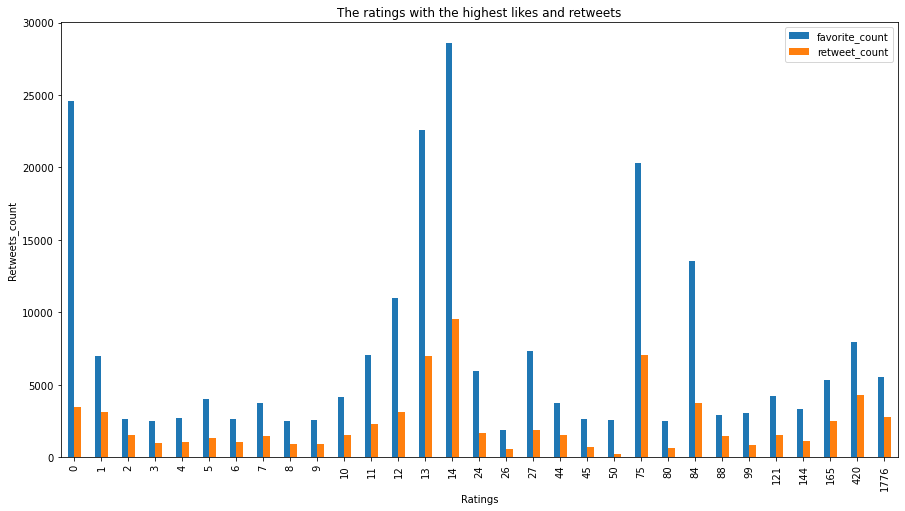

In [746]:
df_twitter_clean.groupby('ratings/10')['favorite_count','retweet_count'].mean().plot(kind='bar',figsize=(15,8),title = 'The ratings with the highest likes and retweets',xlabel='Ratings',ylabel= 'Retweets_count' );

The rating 14/10 was the most accepted and loved, according to the visualization above as it had the greatest engagements. 

### Visualization

In [747]:
visual = df_twitter_clean.groupby('ratings/10')['tweet_id'].count().sort_values(ascending =False)

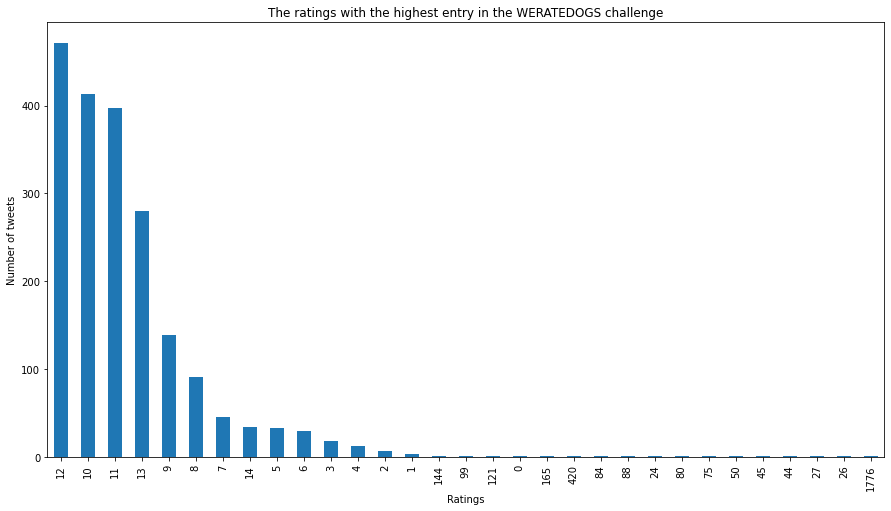

In [748]:
visual.plot(kind='bar',figsize=(15,8),title = 'The ratings with the highest entry in the WERATEDOGS challenge',xlabel='Ratings',ylabel= 'Number of tweets' );

According to the visualization above the rating 12/10 was the most common rating given to dogs in the Weratedogs challenge.